In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Read in the data
disaster = pd.read_csv('data/disaster.csv')

disaster.head(3)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


In [9]:
# Cleaning text data
def preprocess(text):
    
    # set text to lowercase
    text = text.lower() 

    # remove leading and trailing whitespace
    text=  text.strip()  

    # remove html syntax 
    text=  re.sub(r'<.*?>','', text)

    # remove punctuation 
    text = re.sub(r'[^\w\s]','',text)  

    # remove reference numbers (like a paper citation)
    text = re.sub(r'\[[0-9]*\]',' ',text) 

    # remove digits
    text = re.sub(r'\d',' ',text)

    # collapsing multiple spaces into a single space   
    text = re.sub(r'\s+', ' ', text) 
    return text

In [10]:
# Apply string cleaning to text variable
disaster['clean_text'] = disaster['text'].apply(preprocess)
disaster.head(3)

,id,keyword,location,text,target,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...


### What about stop words?

In [ ]:
# Proof that Tfidf vectorizer excludes stopwords
stop_words = ["On March 5th, I will crush my capstone presentation with my awesome team. "] # remove stopwords from this statement

vectorizer_english = TfidfVectorizer(stop_words = "english") # specify argument stop_words = english
X_english = vectorizer_english.fit_transform(stop_words) # fit and transform this Vectorizer to our stop words data

# Print out words not removed 
print(f"Remaining words: ")
print(vectorizer_english.get_feature_names_out())

Remaining words: 
['5th' 'awesome' 'capstone' 'crush' 'march' 'presentation' 'team']


### Logistic Regression

In [12]:
# Split into test and train
X_train, X_test, y_train, y_test = train_test_split(disaster['clean_text'], disaster['target'], test_size=0.3, random_state=42)

In [13]:
# Vectorize words
tfidf_vectorizer = TfidfVectorizer(stop_words= "english")
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [14]:
# Initialize a logistic regression model and fit to vectorized training data
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_tfidf, y_train)
y_pred = lr_model.predict(X_test_tfidf)

### Logistic Regression Results

Accuracy: 0.803


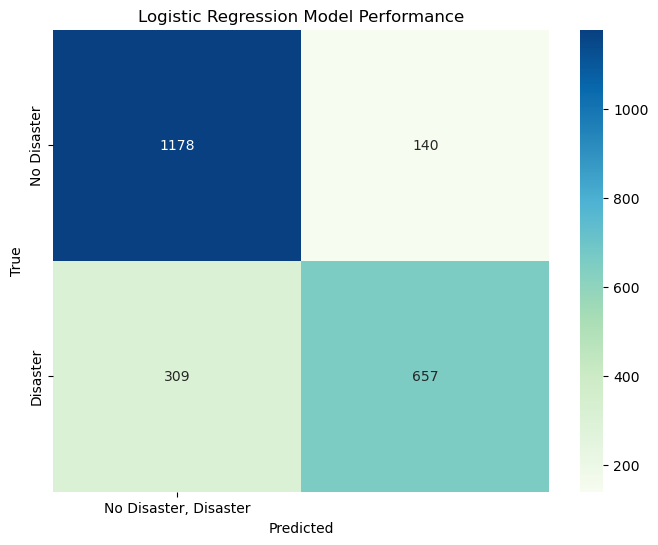

In [16]:
# Calculate LR accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# Create confusion matric for correctly/incorrectly predicting outcome variable
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8,6))
sns.heatmap(cm, annot=True, fmt = 'd', cmap = 'GnBu',
            xticklabels = ['No Disaster, Disaster'],
            yticklabels=['No Disaster', 'Disaster'])
plt.title('Logistic Regression Model Performance')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
new_text = [
    'BREAKING: Massive earthquake hits the coast',
    'I love watching disasters movies on Netflix',
    ' Thousands evacuated as hurricane approaches',
    'Theeeeesssss is a disastttteeerrrrrr',
    "It's windy!",
    'The Palisades fire has damaged over 7,000 structures',
    'I broke my tooth on a jawbreaker'
]

# Preprocess new phrases
cleaned_new_text = [preprocess(text) for text in new_text]

# Transofrm using TF_IDF vectorizer
new_features = tfidf_vectorizer.transform(cleaned_new_text)

# Make predictions
predictions = lr_model.predict(new_features)

# Check outcomes
for text,pred in zip(new_text, predictions):
    print(f"Text: {text}")
    print(f"Predictions: {'Real Disaster' if pred == 1 else 'Not a Real Disaster'}\n")

Text: BREAKING: Massive earthquake hits the coast
Predictions: Real Disaster

Text: I love watching disasters movies on Netflix
Predictions: Not a Real Disaster

Text:  Thousands evacuated as hurricane approaches
Predictions: Real Disaster

Text: Theeeeesssss is a disastttteeerrrrrr
Predictions: Not a Real Disaster

Text: It's windy!
Predictions: Not a Real Disaster

Text: The Palisades fire has damaged over 7,000 structures
Predictions: Not a Real Disaster

Text: I broke my tooth on a jawbreaker
Predictions: Not a Real Disaster

